In [90]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
data = pd.read_csv('airports.csv')
# Fill the values that are NaN
data['AirTime'] = data['AirTime'].fillna(40)

In [91]:
G = nx.from_pandas_edgelist(data, source='Origin', target='Dest', edge_attr=True, create_using=nx.DiGraph)

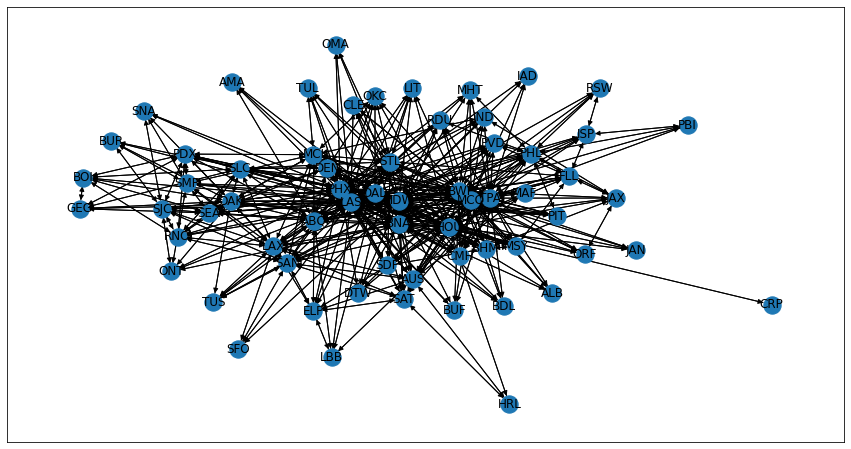

In [92]:
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, with_labels=True)
plt.show()

In [93]:
def bellman_ford(G, origin, dest, attr):
    distance = {}
    parent = {}
    # Initialization
    for node in G.nodes():
        distance[node] = np.inf
        parent[node] = None
    distance[origin] = 0
    edges = list(nx.get_edge_attributes(G, attr).keys())
    weight = nx.get_edge_attributes(G, attr)
    # Assign weights
    for i in range(len(distance)):
        for edge in edges:
            if distance[edge[0]] + weight[edge] < distance[edge[1]]:
                distance[edge[1]] = distance[edge[0]] + weight[edge]
                parent[edge[1]] = edge[0]
            #implement negative cycle
    for edge in edges:
        if distance[edge[0]] + weight[edge] < distance[edge[1]]:
            raise Exception("Graph contains a negative-weight cycle")
    print(distance)
    # Return path
    current = dest
    path = []
    while current:
        path.insert(0, current)
        current = parent[current]
    return path

In [94]:
bellman_ford(G, 'CRP', 'BOI', 'Distance')

{'IAD': 1701, 'TPA': 968, 'IND': 1286, 'BWI': 1433, 'JAX': 1003, 'LAS': 1422, 'MCI': 863, 'MCO': 1035, 'MDW': 1124, 'PHX': 1207, 'ISP': 1653, 'FLL': 1144, 'PBI': 1142, 'RSW': 1168, 'JAN': 546, 'HOU': 187, 'BHM': 757, 'BNA': 857, 'ORF': 1546, 'PHL': 1522, 'ABQ': 946, 'ALB': 1721, 'AMA': 750, 'AUS': 335, 'BDL': 1709, 'BOI': 1730, 'BUF': 1592, 'BUR': 1576, 'CLE': 1305, 'CMH': 1195, 'DEN': 1070, 'ELP': 863, 'GEG': 1985, 'LAX': 1577, 'LBB': 676, 'LIT': 580, 'MAF': 628, 'MHT': 1810, 'MSY': 490, 'OAK': 1829, 'OKC': 606, 'OMA': 1216, 'ONT': 1532, 'PDX': 2057, 'PIT': 1526, 'PVD': 1760, 'RDU': 1300, 'RNO': 1767, 'SAN': 1499, 'SAT': 379, 'SDF': 1080, 'SEA': 2094, 'SFO': 1836, 'SJC': 1808, 'SLC': 1439, 'SMF': 1819, 'SNA': 1545, 'STL': 874, 'TUL': 640, 'TUS': 1267, 'DAL': 426, 'DTW': 1314, 'HRL': 463, 'CRP': 0}


['CRP', 'HOU', 'ABQ', 'SLC', 'BOI']

In [83]:
def get_min_key(distance, unvisited):
    min_val = np.inf
    min_key = unvisited[0]
    for key, value in distance.items():
        if value <= min_val and key in unvisited:
            min_val = value
            min_key = key
    return min_key

def djikstra(G, origin, dest, attr):
    unvisited = list(G.nodes())
    distance = {}
    parent = {}
    weight = nx.get_edge_attributes(G, attr)
    for node in G.nodes():
        distance[node] = np.inf
        parent[node] = None
    distance[origin] = 0

    while len(unvisited) != 0:
        current_node = get_min_key(distance, unvisited)
        unvisited.remove(current_node)
        for neighbor in G.neighbors(current_node):
            new_distance = distance[current_node] + weight[(current_node, neighbor)]
            if(distance[neighbor] > new_distance):
                distance[neighbor] = new_distance
                parent[neighbor] = current_node
    # Return path
    print(distance)
    current = dest
    path = []
    while current:
        path.insert(0, current)
        current = parent[current]

    return path



In [84]:
djikstra(G, 'BOI', 'MAF', 'AirTime')
# nx.shortest_path(G, 'BOI', 'CRP', 'AirTime')

{'IAD': 284.0, 'TPA': 268.0, 'IND': 234.0, 'BWI': 216.0, 'JAX': 290.0, 'LAS': 75.0, 'MCI': 174.0, 'MCO': 279.0, 'MDW': 198.0, 'PHX': 106.0, 'ISP': 254.0, 'FLL': 302.0, 'PBI': 301.0, 'RSW': 307.0, 'JAN': 248.0, 'HOU': 198.0, 'BHM': 245.0, 'BNA': 220.0, 'ORF': 248.0, 'PHL': 293.0, 'ABQ': 101.0, 'ALB': 262.0, 'AMA': 141.0, 'AUS': 194.0, 'BDL': 255.0, 'BOI': 0, 'BUF': 262.0, 'BUR': 115.0, 'CLE': 245.0, 'CMH': 238.0, 'DEN': 104.0, 'ELP': 137.0, 'GEG': 48.0, 'LAX': 104.0, 'LBB': 141.0, 'LIT': 217.0, 'MAF': 150.0, 'MHT': 270.0, 'MSY': 244.0, 'OAK': 75.0, 'OKC': 176.0, 'OMA': 210.0, 'ONT': 107.0, 'PDX': 59.0, 'PIT': 252.0, 'PVD': 263.0, 'RDU': 267.0, 'RNO': 47.0, 'SAN': 113.0, 'SAT': 203.0, 'SDF': 228.0, 'SEA': 62.0, 'SFO': 138.0, 'SJC': 86.0, 'SLC': 40.0, 'SMF': 120.0, 'SNA': 111.0, 'STL': 184.0, 'TUL': 204.0, 'TUS': 128.0, 'DAL': 179.0, 'DTW': 243.0, 'HRL': 246.0, 'CRP': 238.0}


['BOI', 'SLC', 'ABQ', 'MAF']

In [85]:
list(G.neighbors('SFO'))

['LAS', 'LAX', 'MDW', 'SAN']

nan

128.0

810

{('IAD', 'TPA'): 128.0,
 ('IAD', 'LAS'): 292.0,
 ('IAD', 'MCO'): 125.0,
 ('IAD', 'MDW'): 102.0,
 ('TPA', 'ABQ'): 214.0,
 ('TPA', 'ALB'): 136.0,
 ('TPA', 'AUS'): 142.0,
 ('TPA', 'BDL'): 130.0,
 ('TPA', 'BHM'): 68.0,
 ('TPA', 'BNA'): 86.0,
 ('TPA', 'BUF'): 127.0,
 ('TPA', 'BWI'): 104.0,
 ('TPA', 'CMH'): 112.0,
 ('TPA', 'DEN'): 212.0,
 ('TPA', 'FLL'): 34.0,
 ('TPA', 'HOU'): 123.0,
 ('TPA', 'IAD'): 99.0,
 ('TPA', 'IND'): 125.0,
 ('TPA', 'ISP'): 126.0,
 ('TPA', 'JAX'): 36.0,
 ('TPA', 'LAS'): 269.0,
 ('TPA', 'MCI'): 154.0,
 ('TPA', 'MDW'): 167.0,
 ('TPA', 'MHT'): 140.0,
 ('TPA', 'MSY'): 78.0,
 ('TPA', 'ORF'): 87.0,
 ('TPA', 'PBI'): 33.0,
 ('TPA', 'PHL'): 124.0,
 ('TPA', 'PHX'): 255.0,
 ('TPA', 'PIT'): 117.0,
 ('TPA', 'PVD'): 134.0,
 ('TPA', 'RDU'): 75.0,
 ('TPA', 'SAT'): 155.0,
 ('TPA', 'SDF'): 108.0,
 ('TPA', 'STL'): 119.0,
 ('IND', 'BWI'): 67.0,
 ('IND', 'JAX'): 95.0,
 ('IND', 'LAS'): 214.0,
 ('IND', 'MCI'): 77.0,
 ('IND', 'MCO'): 118.0,
 ('IND', 'MDW'): 39.0,
 ('IND', 'PHX'): 198.0,
 ('IN